#Assignment 1

# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/insurance copy.csv") 
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.loc[df["sex"] =="female", "sex"] = 1
df.loc[df["sex"] =="male", "sex"] = 0


from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df["region"] = la.fit_transform(df["region"])
df["smoker"] = la.fit_transform(df["smoker"])


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [7]:
import numpy as np

In [8]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:,-1])

In [9]:
cut = int((len(data) * .8) // 1)

In [10]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [13]:
from sklearn.linear_model import LassoCV

In [15]:
modCV = LassoCV().fit(in_data_scale,in_target)

In [16]:
 dd= modCV.alpha_

In [17]:
dd

133.34880015958146

# 5.) Run a lasso regression with that Lambda

In [24]:
from sklearn.linear_model import Lasso
mod1 = Lasso(alpha = 133.34880015958146).fit(in_data_scale, in_target)
ds = mod1.predict(np.array(in_data_scale))
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

In [21]:
coef= mod1.coef_
coef

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

In [22]:
columns =df.columns[:-1]
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

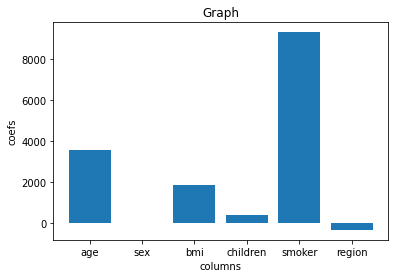

In [27]:
import matplotlib.pyplot as plt

plt.bar(columns, coef)
plt.xlabel('columns')
plt.ylabel('coefs')
plt.title('Graph')
plt.show()

# 7.) Interpret the coefficients

Because the graph is unnormalised we cannot directly interpret it. We can only understand its feature importance and directional relationship. Being a smoker has the strongest magnitude and the region has a negative coeficent indicating that its effect is negative. Age , sex, bmi,children, smoker and region have postive coefficent which indicates a positive effect on insurance decison. While region indicates that a negative effect on the decision of insurance companies. 

# 8.) Compare in and out of sample MSE’s

In [35]:
from sklearn.metrics import mean_squared_error


# Calculation of Mean Squared Error (MSE)
mean_squared_error(in_target,ds)

# Calculate in-sample MSE
in_sample_mse = mean_squared_error(mod1.predict(in_data_scale), in_target)

# Calculate out-of-sample MSE
out_of_sample_mse = mean_squared_error(mod1.predict(out_data_scale), out_target)

print("In-sample MSE: ", in_sample_mse)
print("Out-of-sample MSE: ", out_of_sample_mse)

In-sample MSE:  36490415.101693384
Out-of-sample MSE:  37252730.724018715


In [ ]:
#Out of sample MSE is greater than in sample MSE.